In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001085706"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001085706
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"METRO BANCORP, INC."
Ticker,METR


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,15.0,1.725000e+01,1.630977e+00,14.99,16.01,17.26,1.857500e+01,19.78
interest income,19.0,2.560116e+07,1.377031e+06,24096000.00,24528500.00,24866000.00,2.700550e+07,27917000.00
net income,38.0,2.303947e+06,2.707054e+06,-6160000.00,1524500.00,2475000.00,4.144750e+06,5722000.00
net interest income,37.0,2.051168e+07,3.658355e+06,12745000.00,19015000.00,20775000.00,2.286700e+07,26061000.00
provision for loan losses,38.0,2.467974e+06,2.829612e+06,225000.00,1125000.00,1950000.00,2.600000e+06,13750000.00
total revenue,38.0,2.714068e+07,4.823973e+06,17029000.00,24971750.00,28252500.00,3.027050e+07,34003000.00


# Plots

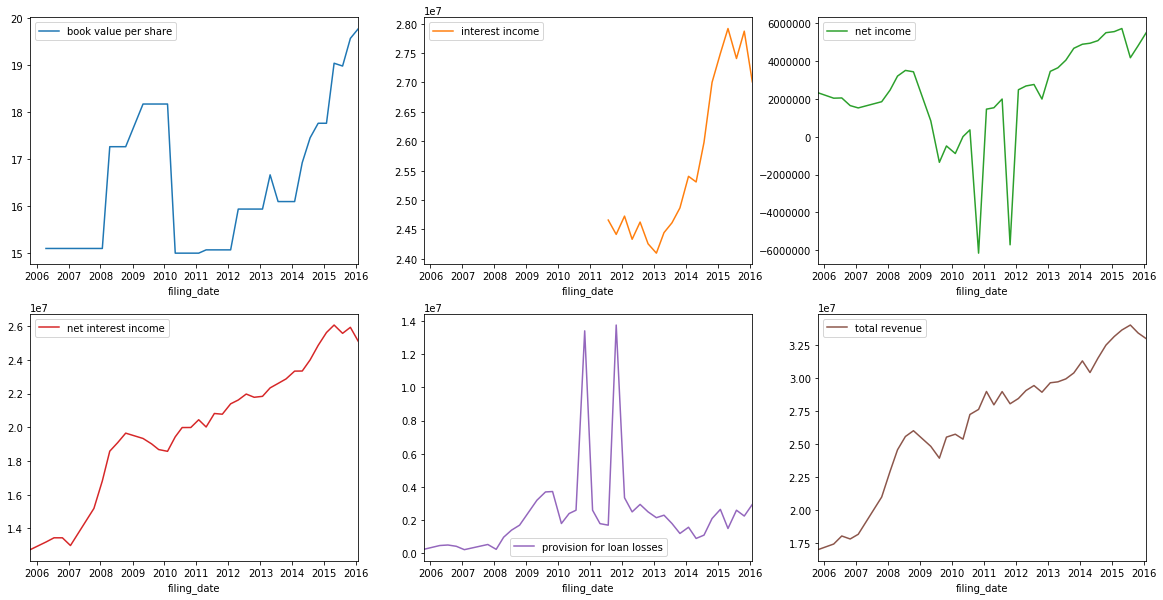

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001085706 book value per share        2005Q3 to 2005Q4: 2 periods  missing   
           book value per share        2006Q2 to 2007Q4: 7 periods  missing   
           book value per share        2008Q2 to 2008Q4: 3 periods  missing   
           book value per share        2009Q2 to 2009Q4: 3 periods  missing   
           book value per share        2010Q2 to 2010Q4: 3 periods  missing   
           book value per share        2011Q2 to 2011Q4: 3 periods  missing   
           book value per share        2012Q2 to 2012Q4: 3 periods  missing   
           book value per share        2013Q3 to 2013Q4: 2 periods  missing   
           book value per share                             2014Q4  missing   
           interest income            2005Q3 to 2011Q1: 23 periods  missing   
           net income                                       2005Q4  missing   
           net income                  2007Q1 to 2007Q2: 2 periods  missing   
           net income                                       2008Q4  missing   
           net interest income                              2005Q4  missing   
           net interest income                              2006Q3  missing   
           net interest income         2007Q1 to 2007Q2: 2 periods  missing   
           net interest income                              2008Q4  missing   
           provision for loan losses                        2005Q4  missing   
           provision for loan losses   2007Q1 to 2007Q2: 2 periods  missing   
           provision for loan losses                        2008Q4  missing   
           total revenue                                    2005Q4  missing   
           total revenue               2007Q1 to 2007Q2: 2 periods  missing   
           total revenue                                    2008Q4  missing   

                                             message  
cik        item                                       
0001085706 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()